In [1]:
# Historically, the computer vision has the  one of the most challengng problem
#Advanced in deep learnining in 2012 synthesised an idea in porder to make great strides in computer vission
# Now computer can identify human faces, object with high accuracy
#

# The hello world of mnist dataset
The mnist data set contain a total of 70000 hand written digits along with trainig labels.
Typically 60,000 re used for taraining the dataset
and the remaining are used for testing the model accuracy
This is known as supervised image classification task.
A machine learning model must classisfy an imqgwe into one of 10 classes or categories.

In [2]:
# Convolutional Layers
#Convolutional layer is the very first layer where we extract features from the images in our 
#datasets. Due to the fact that pixels are only related with the adjacent and close pixels, 
#convolution allows us to preserve the relationship between different parts of an image. 
#Convolution is basically filtering the image with a smaller pixel filter to decrease the size 
#of the image without loosing the relationship between pixels. When we apply convolution to 5x5 
#image by using a 3x3 filter with 1x1 stride (1 pixel shift at each step). We will end up having a 
#3x3 output (64% decrease in complexity).

In [3]:
#Pooling Layer
#When constructing CNNs, it is common to insert pooling layers after each convolution layer
#to reduce the spatial size of the representation to reduce the parameter counts which reduces 
#the computational complexity. In addition, pooling layers also helps with the overfitting problem.
#Basically we select a pooling size to reduce the amount of the parameters by selecting the maximum,
#average, or sum values inside these pixels. Max Pooling, one of the most common pooling techniques,
#may be demonstrated as follows:


In [4]:
#A Set of Fully Connected Layers
#A fully connected network is our RegularNet where each parameter is linked to one another to 
#determine the true relation and effect of each parameter on the labels. Since our time-space 
#complexity is vastly reduced thanks to convolution and pooling layers, we can construct a fully 
#connected network in the end to classify our images. A set of fully connected layers looks like 
#this:

In [5]:
import tensorflow as tf

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
#I have separated these two groups as train and test and also separated the labels and the images.
#x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 
#which represents which number they actually are. To visualize these numbers, we can get help from matplotlib.

In [8]:
import matplotlib.pyplot as plt
image_index = 59999 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
#When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.


8


In [9]:
#We also need to know the shape of the dataset to channel it to the convolutional neural network. Therefore, I will use the “shape” attribute
#of numpy array with the following code:
x_train.shape
#You will get (60000, 28, 28). As you might have guessed 60000 represents the number of images in the train dataset
#and (28, 28) represents the size of the image: 28 x 28 pixel.

(60000, 28, 28)

# Reshaping and Normalizing the Images::
To be able to use the dataset in Keras API, we need 4-dims numpy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:


In [10]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [11]:
#making sure that we have the float type so that we can get the decimal point
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [12]:
## Normalizing the RGB codes by dividing it to the max RGB value
x_train/=255
x_test/=255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])



x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building the Convolutional Neural Network::
We will build our model by using high level Keras API which uses either TensorFlow or Theano on the backend. I would like to mention that there are several high level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high level knowledge. However, this may lead to confusion since they all varies in their implementation structure. Therefore, if you see completely different codes for the same neural network although they all use tensorflow, this is why. I will use the most straightforward API which is Keras. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D array before building the fully connected layers.

In [13]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [14]:
## Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [16]:
#We may experiment with any number for the first Dense layer; however, the final Dense layer 
#must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9). You may always experiment 
#with kernel size, pool size, activationfunctions, dropout rate, and number of neurons in the
#first Dense layer to get a better result.

# Compiling and Fitting the Model::
With the above code, we created an non-optimized empty CNN. Now it is time to set an optimizer with a given loss function which uses a metric. Then, we can fit the model by using our train data. We will use the following code for these tasks:


In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 185s 3ms/step - loss: 0.2129 - accuracy: 0.9346
Epoch 2/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0857 - accuracy: 0.9727
Epoch 3/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0624 - accuracy: 0.9809
Epoch 4/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0433 - accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0354 - accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0294 - accuracy: 0.9905
Epoch 7/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0262 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0216 - accuracy: 0.9928
Epoch 9/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0202 - accuracy: 0.9931
Epoch 10/10
60000/60000 [=====================

In [33]:
#You can experiment with the optimizer, loss function, metrics, and epochs. However, I can say that adam optimizer is usually 
#out-performs the other optimizers. I am not sure if you can actually change the loss function for
#multi-class classification. Feel free to experiment and comment below. Epoch number might seem a 
#bit small. However, you will reach to 98–99% test accuracy. Since the MNIST dataset does not 
#require heavy computing power, you may easily experiment with the epoch number as well.

 # Evaluating the Model ::
 Finally, you may evaluate the trained model with x_test and y_test using one line of code:

In [34]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 12s 1ms/step


[0.05866284617047213, 0.9854999780654907]

# 
We achieved 98.5% accuracy with such basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following code:

8


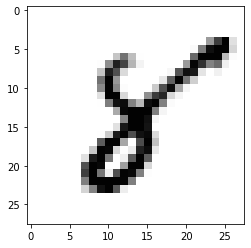

In [41]:
image_index = 7444  ### random.randrange(10000)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

# congrats
::
You have successfully built a convolutional neural network to classify hand written digits with Tensorflow’s Keras API. You have achieved an accuracy over 98% 